In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas_ta as ta

## Cleaning the data

In [38]:
def cleaning_data(data):
    # Make a copy of the dataframe 
    df = data.copy()
    
    # Check for correct arguments' type
    df['Date'] = pd.to_datetime(df['Date'])
    numeric_cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    df.reset_index(inplace=True)
    df.drop(['index'] , axis=1 , inplace=True)
    
    #handle missing data
    if df.isnull().sum().sum() > 0:  # Check for any missing values
        for col in numeric_cols:
            if col in df.columns:
                # Fill numeric columns with the mean of each column
                df[col] = df[col].fillna(df[col].mean())
    else:
        return df
    
    #Data is Sorted by Date
    df = df.sort_values(by='Date').reset_index(drop=True)

    df = df.dropna()

    #Reset the index after all transformations
    df = df.reset_index(drop=True)

    return df

## Features Engeniring

In [39]:
def extract_features (data):
    df = data.copy()
    # Check for correct arguments' type
    df['Date'] = pd.to_datetime(df['Date'])
    numeric_cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    #Main function 
    #Daily return : The .pct_change() method calculates the percentage change between consecutive rows in the Adj Close column.
    df['Daily Return'] = df['Adj Close'].pct_change()
    #5d_momentum : Le momentum est un indicateur clé en finance. 
    #Il permet de mesurer la force et la direction d’un mouvement de prix sur une période donnée.
    df['5d_momentum'] = df['Close'] / df['Close'].shift(5)
    #EMA : Exponential Moving Average  
    short_ema = df['Adj Close'].ewm(span=12, adjust=False).mean()  # 12-day EMA (deux semaine)
    long_ema = df['Adj Close'].ewm(span=26, adjust=False).mean()  # 26-day EMA (un mois)
    df['MACD_Line'] = short_ema - long_ema
    #Signal line :
    df['Signal_Line'] = df['MACD_Line'].ewm(span=9, adjust=False).mean()
    # RSI :Tis an indicator that lets you know if a stock is overbought or oversold. When its value is above 70, we often talk about an overbought situation. Although some traders use the 80 level as a threshold
    df.ta.rsi(lenght=14 , append=True)
    #bbands : 
    df.ta.bbands(append=True)
    #adx : force de la tendance
    df.ta.adx(length=14, append=True)

    return df;

In [40]:
def handle_null_values(data):
    # Identifier les colonnes de type datetime
    datetime_columns = data.select_dtypes(include=['datetime64']).columns
    
    # Séparer les colonnes numériques et datetime
    numeric_data = data.drop(columns=datetime_columns)
    
    # Imputation des colonnes numériques
    imputer = SimpleImputer(strategy='mean')
    numeric_data_imputed = imputer.fit_transform(numeric_data)
    
    # Reconstruire le DataFrame après imputation
    numeric_data_imputed = pd.DataFrame(numeric_data_imputed, columns=numeric_data.columns)
    
    # Ajouter les colonnes datetime non modifiées
    final_data = pd.concat([numeric_data_imputed, data[datetime_columns]], axis=1)
    
    return final_data


## Apply Function to the dataset

In [41]:
path="Data Historical/AAPL_data.csv"
df = pd.read_csv(path)

In [42]:
cleaned_data = cleaning_data(df)
featured_data = extract_features(cleaned_data)
socket_data = handle_null_values(featured_data)
socket_data


,Adj Close,Close,High,Low,Open,Volume,Daily Return,5d_momentum,MACD_Line,Signal_Line,RSI_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,ADX_14,DMP_14,DMN_14,Date
0,0.098834,0.128348,0.128906,0.128348,0.128348,469033600.0,0.001093,1.005358,0.000000,0.000000,53.104761,23.147636,23.782745,24.417855,7.956794,0.519797,26.316697,25.917114,23.771798,1980-12-12
1,0.093678,0.121652,0.122210,0.121652,0.122210,175884800.0,-0.052171,1.005358,-0.000411,-0.000082,53.104761,23.147636,23.782745,24.417855,7.956794,0.519797,26.316697,25.917114,23.771798,1980-12-15
2,0.086802,0.112723,0.113281,0.112723,0.113281,105728000.0,-0.073398,1.005358,-0.001277,-0.000321,53.104761,23.147636,23.782745,24.417855,7.956794,0.519797,26.316697,25.917114,23.771798,1980-12-16
3,0.088951,0.115513,0.116071,0.115513,0.115513,86441600.0,0.024751,1.005358,-0.001770,-0.000611,53.104761,23.147636,23.782745,24.417855,7.956794,0.519797,26.316697,25.917114,23.771798,1980-12-17
4,0.091530,0.118862,0.119420,0.118862,0.118862,73449600.0,0.028993,1.005358,-0.001930,-0.000875,53.104761,0.108645,0.119420,0.130194,18.045051,0.474125,26.316697,25.917114,23.771798,1980-12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11075,228.020004,228.020004,229.740005,225.169998,225.250000,44686000.0,0.013422,1.016902,-0.610971,-0.607063,51.542650,222.789753,226.117999,229.446245,2.943813,0.785737,12.246967,25.874596,23.778201,2024-11-18
11076,228.279999,228.279999,230.160004,226.660004,226.979996,36211800.0,0.001140,1.018062,-0.414482,-0.568547,51.986984,223.871766,226.928000,229.984234,2.693571,0.721187,11.782090,25.008576,22.294025,2024-11-19
11077,229.000000,229.000000,229.929993,225.889999,228.059998,35169600.0,0.003154,1.017235,-0.198379,-0.494513,53.265028,224.919886,227.704001,230.488116,2.445381,0.732749,11.121455,23.207885,22.061133,2024-11-20
11078,228.520004,228.520004,230.160004,225.710007,228.880005,42071900.0,-0.002096,1.001315,-0.065097,-0.408630,52.266187,224.925590,227.764001,230.602413,2.492415,0.633174,10.575246,21.788388,20.325142,2024-11-21


In [43]:
socket_data.isnull().sum()

Adj Close       0
Close           0
High            0
Low             0
Open            0
Volume          0
Daily Return    0
5d_momentum     0
MACD_Line       0
Signal_Line     0
RSI_14          0
BBL_5_2.0       0
BBM_5_2.0       0
BBU_5_2.0       0
BBB_5_2.0       0
BBP_5_2.0       0
ADX_14          0
DMP_14          0
DMN_14          0
Date            0
dtype: int64

In [44]:
print("******************************  \n")
print("Largest  value  \n \n" , socket_data['Daily Return'].nlargest(5))
print("******************************  \n")
print("Smallest value  \n \n" ,  socket_data['Daily Return'].nsmallest(5))
print("******************************  \n")
print(socket_data.nsmallest(10, '5d_momentum')[['Date', '5d_momentum']])

******************************  

Largest  value  
 
 4209    0.332280
4312    0.238088
3943    0.237035
4314    0.192916
3247    0.189471
Name: Daily Return, dtype: float64
******************************  

Smallest value  
 
 5004   -0.518692
703    -0.253844
1731   -0.243524
3183   -0.230767
1736   -0.211267
Name: Daily Return, dtype: float64
******************************  

           Date  5d_momentum
5008 2000-10-05     0.412383
5006 2000-10-03     0.433779
5005 2000-10-02     0.453271
5007 2000-10-04     0.482759
5004 2000-09-29     0.493413
1732 1987-10-20     0.633028
3184 1993-07-19     0.674343
1731 1987-10-19     0.685447
707  1983-09-29     0.700005
3186 1993-07-21     0.704699


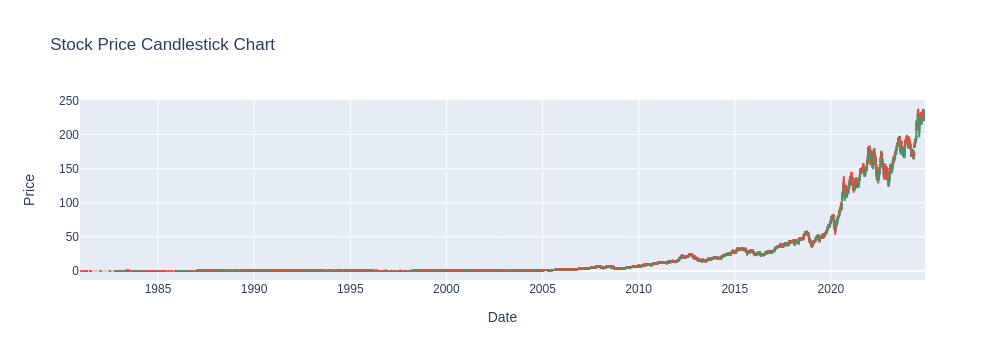

In [45]:
#visualize the price movement
# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=socket_data['Date'],  
    open=socket_data['Open'],  
    high=socket_data['High'],  
    low=socket_data['Low'], 
    close=socket_data['Close']
)])

fig.update_layout(
    title='Stock Price Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False  # Optional: Hide the range slider
)

fig.show()


In [46]:
# Calculate volatility (standard deviation of daily returns l'ecart type)
volatility = socket_data['Daily Return'].std()
print(f"Volatility 'écart-type': {volatility}")

Volatility 'écart-type': 0.027810154687033586


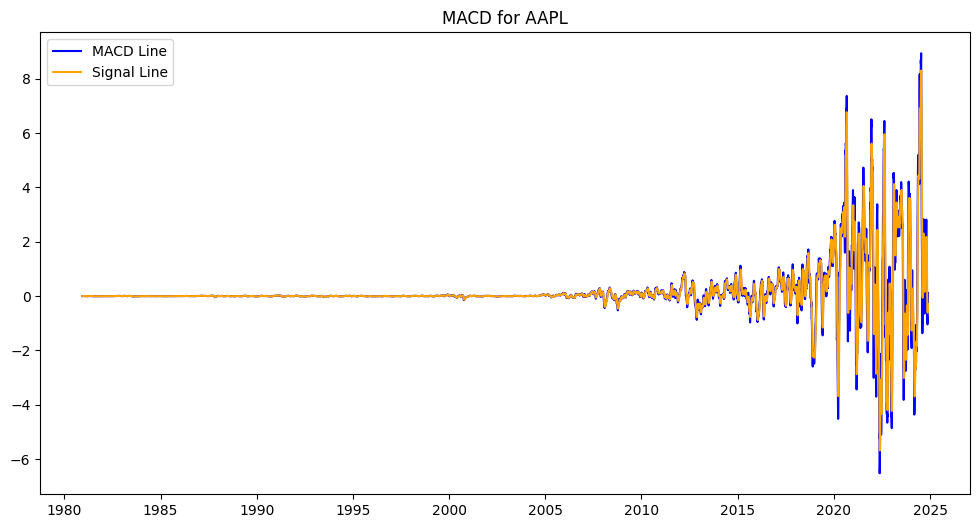

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(socket_data['Date'], socket_data['MACD_Line'], label='MACD Line', color='blue')
plt.plot(socket_data['Date'], socket_data['Signal_Line'], label='Signal Line', color='orange')
plt.title('MACD for AAPL')
plt.legend(loc='upper left')
plt.show()
